In [1]:
import numpy as np
import matplotlib as mpl; mpl.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.integrate import solve_ivp

%matplotlib inline

In [2]:
# The van der Pol oscillator's equation.
def y_prime(t, y, mu):
    return y[1], mu * (1 - y[0]**2) * y[1] - y[0]

## Gap #1: Forward Euler method

In [3]:
# Forward Euler method with constant step size
def forward_euler(y_prime, y0, t_span, h, args):
    y   = np.array(y0)
    ts  = np.arange(t_span[0], t_span[1] + h, h)
    ys  = np.empty((len(y0), len(ts)))

    for i, t in enumerate(ts):
        ys[:, i] = y
        y += h * np.array(y_prime(t, y, *args))

    return ts, ys

In [4]:
def plot_solution(fn, t, y, filename):
    plt.close()
    fn(t, y[0, :], color='red',  label='y')
    fn(t, y[1, :], color='blue', label='dy/dt')
    plt.gca().set_xlabel('time')
    plt.legend()
    plt.title('Van der Pol oscillator')
    plt.tight_layout()
    # plt.savefig(filename)

## Numerically good and bad solutions. Different solvers.

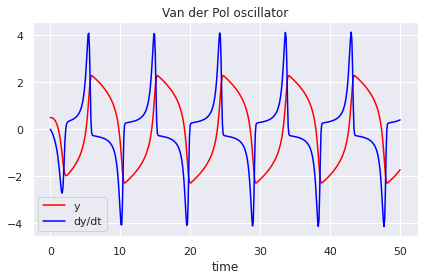

In [5]:
t, y = forward_euler(y_prime, y0=[0.5, 0], t_span=(0, 50), h=0.1, args=(2,))
plot_solution(sns.lineplot, t, y, 'van_der_Pol_good.pdf')

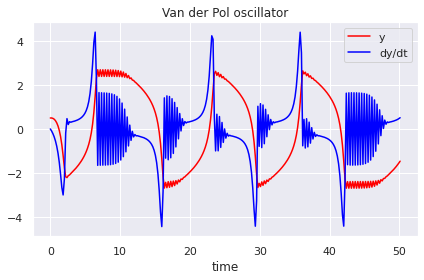

In [6]:
t, y = forward_euler(y_prime, y0=[0.5, 0], t_span=(0, 50), h=0.1835, args=(2,))
plot_solution(sns.lineplot, t, y, 'van_der_Pol_bad.pdf')

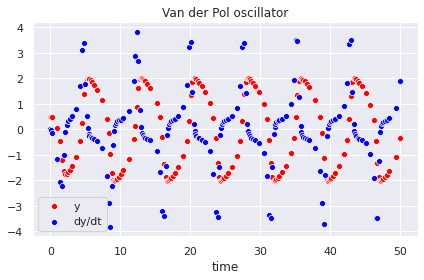

In [7]:
solution = solve_ivp(y_prime, t_span=(0, 50), y0=[0.5, 0], args=(2,))
t, y = solution.t, solution.y
plot_solution(sns.scatterplot, t, y, 'van_der_Pol_RK45.pdf')

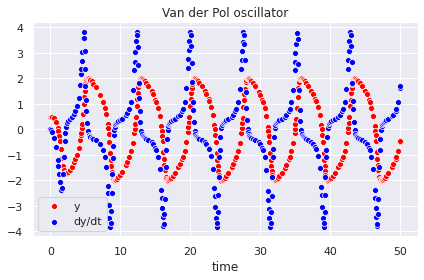

In [8]:
solution = solve_ivp(y_prime, t_span=(0, 50), y0=[0.5, 0], args=(2,), method='Radau')
t, y = solution.t, solution.y
plot_solution(sns.scatterplot, t, y, 'van_der_Pol_Radau.pdf')

## Plotting the Phase Portrait

In [9]:
# Plot phase portrait: y against dy/dt.
# Solve for many points for a smoother picture.
solution = solve_ivp(
    y_prime, t_span=(0, 50), y0=[0, 0.5],
    t_eval=np.arange(0, 50, 0.1), args=(2,),
    method='Radau'
)
t, y = solution.t, solution.y

## Gap #2: The Direction Field

In [10]:
# Compute direction field (dy/dt, d^2y/dt^2), for every
# possible point (y, dy/dt), not only at the solutions.
X, Y = np.meshgrid(
    np.linspace(-2.25, 2.25, num=24),
    np.linspace(-4.5,  4.5,  num=24),
)
U, V = Y, 2 * (1 - X**2) * Y - X
mag = np.linalg.norm([U, V], axis=0)
U, V = U / mag, V / mag

## Gap #3: Uncomment the commented lines once U and V are computed

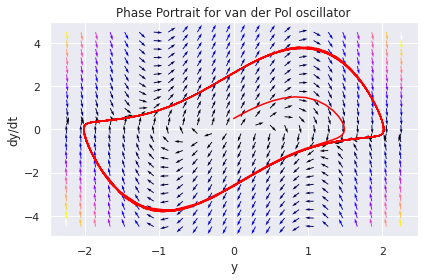

In [11]:
plt.close()
sns.lineplot(y[0, :], y[1, :], sort=False, color='red')
plt.quiver(X, Y, U, V, mag, cmap='gnuplot2')
plt.gca().set_xlabel('y')
plt.gca().set_ylabel('dy/dt')
plt.title('Phase Portrait for van der Pol oscillator')
plt.tight_layout()
# plt.savefig('van_der_Pol_phase_portrait.pdf')

## The Logistic Map

In [12]:
# The Logistic Map.
def logistic_map(y, r):
    return r * y * (1 - y)

def eval_logistic_map(n_steps, r):
    ts = np.arange(n_steps)
    y = 0.5
    ys = []

    for t in ts:
        ys.append(y)
        y = logistic_map(y, r)

    return ts, np.array(ys)

In [13]:
# First, plot the time evolution explicitly.
def plot_time_evolution(r, filename):
    ts, ys = eval_logistic_map(n_steps=64, r=r)

    plt.close()
    sns.lineplot(ts, ys)
    plt.ylim(0, 1) # always show every y value between 0 and 1
    plt.title('Logistic Map Time Evolution, r = {}'.format(r))
    plt.tight_layout()
    # plt.savefig(filename)

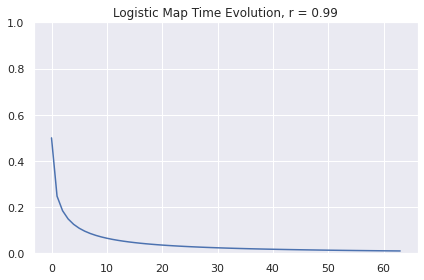

In [14]:
plot_time_evolution(0.99, 'logistic_map_time_evol_0.99.pdf')

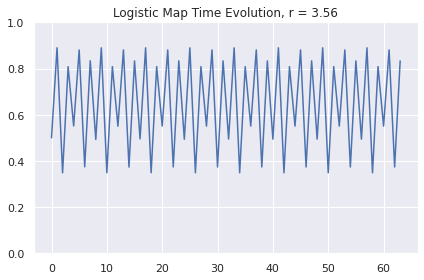

In [15]:
plot_time_evolution(3.56, 'logistic_map_time_evol_3.56.pdf')

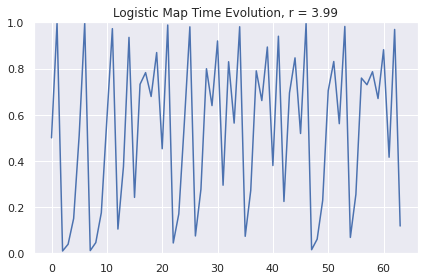

In [16]:
plot_time_evolution(3.99, 'logistic_map_time_evol_3.99.pdf')

## Gap #4: Compute Fixed Points

In [17]:
def fixed_points(r):
    _, ys = eval_logistic_map(n_steps=1024, r=r)
    ys = ys[512:] # get rid of the transient
    fix = ys[0]
    yfix = [fix]

    for y in ys[1:]:
        # arbitrary tolerance for detecting a cycle
        if np.abs(y - fix) < 0.001:
            break

        yfix.append(y)

    # Also return value of `r` replicated as many times as
    # there are fixed points, for more convenient plotting.
    return np.full_like(yfix, r), np.array(yfix)

In [18]:
def plot_bifurcation(rs):
    fixes = [fixed_points(r) for r in rs]
    xs = np.hstack([f[0] for f in fixes])
    ys = np.hstack([f[1] for f in fixes])

    plt.close()
    sns.scatterplot(xs, ys, s=1, edgecolor='none')
    plt.title('Bifurcation of the Logistic Map')
    plt.gca().set_xlabel('Coefficient $r$ in $y_{t+1} = r y_t(1-y_t)$')
    plt.gca().set_ylabel('Orbit points')
    plt.tight_layout()
    # plt.savefig('logistic_map_bifurcation.pdf')

## Change range of `linspace` to zoom!

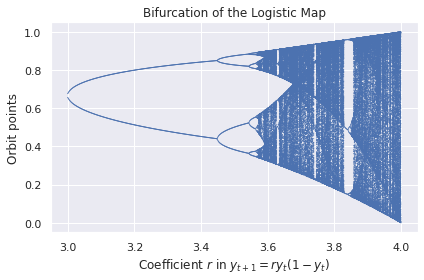

In [19]:
rs = np.linspace(3, 4, num=1024) # Change this to zoom
plot_bifurcation(rs)